### 1. Transfer Learning and Pre-Trained Models

Suppose we want to know whether a picture is of a dog or a cat; here, we can have two approaches. One is building a deep learning model from scratch and then passing on the new pictures to the networks. Another option is to use a pre-trained deep learning neural network model that has already been built by using cats' and dogs' images, instead of creating a neural network from scratch.

Using the pre-trained model saves us computational time and resources. There can be some unforeseen advantages of using a pre-trained network. For example, almost all the pictures of dogs and cats will have some more objects in the picture, such as trees, the sky, and furniture. We can even use this pre-trained network to identify objects such as trees, the sky, and furniture.

So, a pre-trained network is a saved network (a neural network, in the case of deep learning) that was trained on a very large dataset, mostly on image classification problems. To work on a pre-trained network, we need to understand the concepts of feature extraction and fine-tuning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To understand feature extraction, we need to revisit the architecture of a convolutional neural network.

You may recall that the full architecture of a CNN, at a high level, consists of the following components:

- A convolution layer
- A pooling and flattening layer
- A Multi Layer Preceptron (MLP)

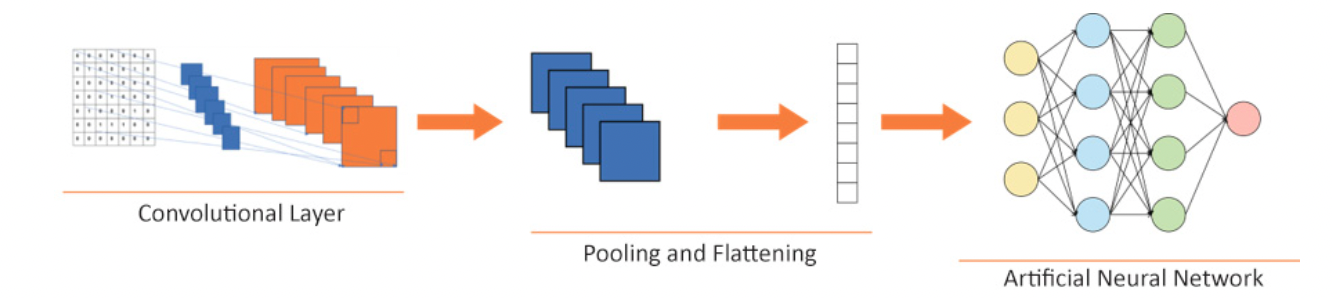

The first part is called a convolutional base while the second part is called the classifier.

In feature extraction, we keep reusing the convolutional base, and the classifier is changed. So, we preserve the learnings of the convolutional layer, and we can pass different classifiers on top of the convolutional layer. A classifier can be dog versus cat, bikes versus cars, or even medical X-ray images to classify tumors, infections, and so on. 

### 2. Identifying an Image Using the VGG16 Network
We have a picture of a slice of pizza. We will use the VGG16 network to process and identify the image.

#### 2.1 Import the libraries:

In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

#### 2.2 Initiate the model:

In [2]:
classifier = VGG16()
print(classifier.summary())

553467904/553467096 [==============================] - 21s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

#### 2.3 Load the image.

8.3.1


C:\Users\KAIST\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in Pillow 9 (2022-01-02). Use __version__ instead.
  import sys


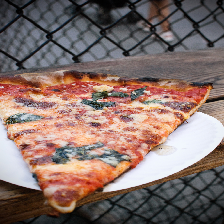

In [19]:
import os

#!pip install -U pillow
#
# import PIL
import PIL
print(PIL.PILLOW_VERSION)
# this should print 8.3.2 If it doesn't, then restart your runtime:
# Menu > Runtime > Restart Runtime

#mypath='drive/MyDrive/Courses/MagniMind/Mentorship Program/DL-MentorProgram/DL_Mentor_Week2/Class 2/Week2-Class2-St'
mypath =r"C:\Users\KAIST\Google Drive\Courses\MagniMind\Mentorship Program\DL-MentorProgram\DL_Mentor_Week2\Class 2\Week2-Class2-St\Prediction\\"
#pathimage1=os.path.join(mypath, 'Prediction/')


#new_image= image.load_img(pathimage1+'pizza.jpg', target_size=(224, 224))
new_image= image.load_img(mypath+'pizza.jpg', target_size=(224, 224))


new_image

In [20]:
pathimage1

'drive/MyDrive/Courses/MagniMind/Mentorship Program/DL-MentorProgram/DL_Mentor_Week2/Class 2/Week2-Class2-St\\Prediction/'

In [21]:
new_image.size

(224, 224)

#### 2.4 Change the image to an array by using the img_to_array function
Next, we can convert the pixels to a NumPy array so that we can work with it in Keras. We can use the img_to_array() function for this.

In [22]:
transformed_image = image.img_to_array(new_image)

transformed_image.shape

(224, 224, 3)

#### 2.5 Change the image into four-dimensional form

The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.


In [23]:
# reshape data for the model
transformed_image = transformed_image.reshape((1, transformed_image.shape[0], transformed_image.shape[1], transformed_image.shape[2]))

You an also do the same thing as follows:

In [24]:
#transformed_image = np.expand_dims(transformed_image, axis=0)

transformed_image.shape

(1, 224, 224, 3)

In [25]:
transformed_image

array([[[[32., 33., 38.],
         [26., 27., 31.],
         [28., 28., 30.],
         ...,
         [ 2.,  2.,  2.],
         [15., 13., 14.],
         [35., 35., 37.]],

        [[32., 33., 37.],
         [28., 27., 32.],
         [34., 35., 37.],
         ...,
         [ 2.,  3.,  5.],
         [23., 28., 31.],
         [48., 49., 54.]],

        [[33., 34., 38.],
         [32., 33., 37.],
         [40., 39., 44.],
         ...,
         [ 2.,  2.,  2.],
         [17., 23., 23.],
         [44., 45., 50.]],

        ...,

        [[32., 18.,  9.],
         [30., 13.,  6.],
         [31., 14.,  4.],
         ...,
         [26., 30., 33.],
         [19., 19., 19.],
         [ 8.,  7.,  3.]],

        [[27., 13.,  4.],
         [27., 10.,  3.],
         [28., 11.,  4.],
         ...,
         [28., 29., 31.],
         [15., 14., 10.],
         [ 9.,  5.,  2.]],

        [[22.,  9.,  3.],
         [22.,  9.,  1.],
         [26., 11.,  4.],
         ...,
         [23., 23., 23.],
        

#### 2.6 Preprocess the image
Next, the image pixels need to be prepared in the same way as the ImageNet training data was prepared. Specifically, from the original paper:

`The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.
Preprocess the image using the preprocess_input function`

In [26]:
transformed_image = preprocess_input(transformed_image)

transformed_image

array([[[[ -65.939   ,  -83.779   ,  -91.68    ],
         [ -72.939   ,  -89.779   ,  -97.68    ],
         [ -73.939   ,  -88.779   ,  -95.68    ],
         ...,
         [-101.939   , -114.779   , -121.68    ],
         [ -89.939   , -103.779   , -108.68    ],
         [ -66.939   ,  -81.779   ,  -88.68    ]],

        [[ -66.939   ,  -83.779   ,  -91.68    ],
         [ -71.939   ,  -89.779   ,  -95.68    ],
         [ -66.939   ,  -81.779   ,  -89.68    ],
         ...,
         [ -98.939   , -113.779   , -121.68    ],
         [ -72.939   ,  -88.779   , -100.68    ],
         [ -49.939003,  -67.779   ,  -75.68    ]],

        [[ -65.939   ,  -82.779   ,  -90.68    ],
         [ -66.939   ,  -83.779   ,  -91.68    ],
         [ -59.939003,  -77.779   ,  -83.68    ],
         ...,
         [-101.939   , -114.779   , -121.68    ],
         [ -80.939   ,  -93.779   , -106.68    ],
         [ -53.939003,  -71.779   ,  -79.68    ]],

        ...,

        [[ -94.939   ,  -98.779   ,  -

#### 2.7 Create the `predictor` variable:
We can call the `predict()` function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.

In [27]:
y_pred = classifier.predict(transformed_image)

y_pred

array([[8.85203164e-08, 1.87728335e-06, 1.08522748e-07, 1.54110698e-08,
        6.45584578e-07, 1.24716155e-06, 4.30694001e-07, 1.34532138e-06,
        3.88405761e-06, 1.79815931e-08, 6.62173960e-08, 1.22414249e-07,
        1.53968595e-05, 2.62047024e-07, 7.45989013e-08, 1.00192892e-07,
        1.80264408e-08, 2.60931074e-07, 1.80378336e-07, 5.88955061e-07,
        2.03586801e-08, 2.46094913e-08, 1.02709210e-08, 2.72066281e-08,
        3.79420619e-08, 4.92236740e-09, 2.62524900e-08, 7.65926060e-08,
        1.05240989e-08, 3.50511407e-08, 2.17934044e-08, 3.83020549e-08,
        2.34992097e-08, 1.43329498e-06, 2.31770116e-07, 6.41875353e-09,
        7.62334906e-08, 1.58756251e-07, 1.70508628e-07, 1.98356958e-07,
        6.90873847e-08, 1.79643163e-08, 1.31652030e-06, 1.75151101e-07,
        9.60860618e-08, 9.44046050e-08, 3.29602976e-08, 1.52258252e-07,
        2.05898640e-08, 3.49597514e-07, 3.18542959e-07, 2.88115007e-08,
        8.90254057e-08, 4.50871411e-08, 1.70299487e-07, 2.950091

#### 2.8 Check the shape of the image. 
It should be (1,1000). It's 1000 because the ImageNet database has 1000 categories of images. The predictor variable shows the probability of our image being one of those images:


In [28]:
y_pred.shape

(1, 1000)

#### 2.9 Print the top five probabilities of what our image is
Use the `decode_predictions` function and pass the function of the predictor variable, `y_pred`, and the number of predictions and corresponding labels to output:

In [29]:
from keras.applications.vgg16 import decode_predictions

decode_predictions(y_pred,top=5)

40960/35363 [==================================] - 0s 2us/step


[[('n07873807', 'pizza', 0.97680557),
  ('n07871810', 'meat_loaf', 0.012848711),
  ('n07880968', 'burrito', 0.0019428886),
  ('n04270147', 'spatula', 0.0019108377),
  ('n03887697', 'paper_towel', 0.0009799746)]]

#### 2.10 Put the predictions in a human-readable form. 
Print the most probable label from the output from the result of the `decode_predictions` function:


In [30]:
label = decode_predictions(y_pred)

# Most likely result is retrieved, for example, the highest probability

decoded_label = label[0][0]

# The classification is printed

print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

pizza (97.68%)
